
**Quantum Computing and Informatics**
> **Teacher Assistent: Sthefanie Passo**

> **E-mail: sthefanie.passo@utsa.edu**

# Install Qiskit and Setup Jupyter Notebook

### How to install Jupyter in your local computer

First install Anaconda Python Distribution at [www.anaconda.com/download](https://www.anaconda.com/download)

### Install Qiskit

Once the installation is complete, launch the “**Anaconda Prompt**”

In the anaconda prompt, type “**pip install qiskit**”
![link text](https://miro.medium.com/v2/resize:fit:1200/1*slrJOCdCaWt2BJfHqdiXTQ.png)


### Launch Jupyter Notebook
Launch the Jupyter Notebook by just typing the command “**jupyter notebook**”

Now create a new Python 3 Notebook by clicking New > Python 3




### Colaboratory is another option

Although  there is an online version of Jupyter Notebooks that allows for collaborative and real-time edition of your notebooks [Google Colaboratory](https://colab.research.google.com/)!

For this class we will be using the Google Colaboratory and Qiskit.

![link text](https://miro.medium.com/v2/resize:fit:986/1*pimj8lXWwZnqLs2xVCV2Aw.png)

## Qiskit Sign Up

Go to [https://quantum.ibm.com/](https://quantum.ibm.com/) and **create your account**

Click on the user icon on the top right corner and
select "**My Account**"

Click the "**Copy token**" (blue button) to copy your API token to the clipboard

Go back tou your Colab and import IBMQ from Qiskit by typing the below line in the Jupyter Notebook and hit “**Shift"+Enter**”

```
!pip install qiskit

import qiskit
```

![link text](https://quantum.ibm.com/_nuxt/img/platformDarkScreenshot.ac4ed2c.png)



# Qiskit Libraries

Before we start coding, we need to install qiskit

You can install a specific vertion: **pip install qiskit==1.2.3**

In [1]:
!pip install qiskit
!pip install qiskit_ibm_runtime


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Gaige\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/149.4 kB ? eta -:--:--
     ---------------- ---------------------- 61.4/149.4 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 149.4/149.4 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---- ----------------------------------- 0.4/3.0 MB 7.6 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/3.0 MB 10.7 MB/s eta 0:00:01
   ---------------------- ----------------- 1.8/3.0 MB 13.9 MB/s eta 0:00:01
   ---------------------------------- ----- 2.7/3.0 MB 14.1 MB/s eta 0:00:01
   ---------------------------------------- 3.0/3.0 MB 12.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/340.8 kB ? eta -:--:--
   -------------------------------------- - 327.7/340.8 kB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 340.8/340.8 kB 5.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/434.9 kB ? eta -:--:--
   ---------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Gaige\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


After we need to import the libraries that are needed

In [2]:
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService

You now have an IBM Q Experience's **API token, save** it to your computer by typing the bellow line and hit **Shift+Enter**

In [3]:

service = QiskitRuntimeService(channel="ibm_quantum",token= "74873d09e8fe75ae28bd17db6c9272db41634e8f38322e53c97555873378ab0399680f3b30af9529260b0ed914ce4c577bf264f6d33c949ec50c36d3b8e639e8")

# Quantum Backend

To view the backends you have access to, you can either view a list on the Compute resources page, or you can use the **QiskitRuntimeService.backends()** method. This method returns a list of IBMBackend instances:



In [4]:
all = service.backends()

In [5]:
all

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

The **QiskitRuntimeService.backend()** method (note that this is singular: backend) takes the name of the backend as the input parameter and returns an IBMBackend instance representing that particular backend:

In [6]:
service.backend("ibm_sherbrooke")

<IBMBackend('ibm_sherbrooke')>

### Filter backends

You can also filter the available backends by their properties. For more general **filters**, set the filters argument to a function that accepts a backend object and returns **True** if it meets your criteria. Refer to the API documentation for more details.

The following code returns only backends that fit these criteria:


```
Are real quantum devices (simulator=False)
Are currently operational (operational=True)
Have at least 5 qubits (min_num_qubits=5)
```




In [7]:
service.backends(simulator=True, operational=True, min_num_qubits=5)

[]

Use these keyword arguments to filter by any attribute in backend configuration (JSON schema) or status (JSON schema). A similar method is **QiskitRuntimeService.least_busy()**, which takes the same filters as backends() but returns the backend that matches the filters and has the least number of jobs pending in the queue:

In [8]:
service.least_busy(operational=True, min_num_qubits=5)

<IBMBackend('ibm_kyiv')>

## Static backend information

Some information about a backend does not change regularly, such as its name, version, the number of qubits it has, and the types of features it supports. This information is available as attributes of the **backend** object.

The following cell builds a description of a backend.

In [9]:
backend = service.backend("ibm_sherbrooke")

print(
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
)

Name: ibm_sherbrooke
Version: 2
No. of qubits: 127



# Creating our first circuit

For a full list of attributes, see the IBMBackend API [documentation](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.IBMBackend).



In [10]:
!pip install pylatexenc


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Gaige\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


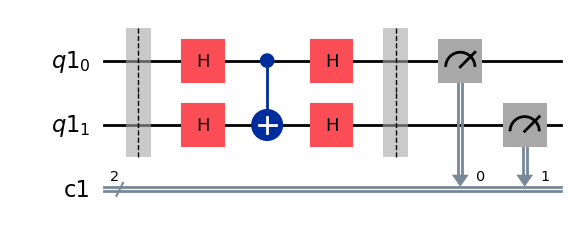

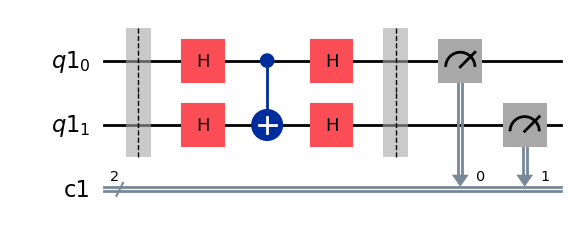

In [12]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit
from qiskit.compiler import transpile, assemble
import matplotlib.pyplot as plt

# Loading your IBM Q account(s)

# We create a quantum circuit that is made up of the quantum register and the classic register
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr,cr)
# Add gates to the quantum circuit circuit.x(qr[1])
circuit.barrier()
circuit.h(qr[0])
circuit.h(qr[1])
circuit.cx(qr[0],qr[1])
circuit.h(qr[0])
circuit.h(qr[1])
circuit.barrier()
circuit.measure(qr,cr)
circuit.draw('mpl')


If the draw does not work: "you must restart your notebook kernel and run again. It worked for me!" [Stakoverflow](https://stackoverflow.com/questions/68954685/qiskit-mpl-drawer-module)

Set the backend on which to run.

Please first check which backends are available for you by running the below codes, then use that one which is available.


In [13]:
all

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [14]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [15]:
backend = service.backend("ibm_sherbrooke")

Create a quantum job for the circuit

In [18]:
# Optimize the circuit using a preset pass manager
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
optimized_circuit = pm.run(circuit)

# Initialize the sampler and run the job
sampler = Sampler(backend)
job = sampler.run([optimized_circuit])
result = job.result()

# Get the result counts for the quantum circuit
pub_result = result[0]
counts = pub_result.data.c1.get_counts()
print(f" >> Measurement results: {counts}")


#orginal counts = pub_result.data.c1.get_counts()

qiskit_runtime_service.check_pending_jobs:WARNING:2024-12-10 18:32:09,997: The pending jobs limit has been reached. Waiting for job <RuntimeJob('cwznmr3997wg008yfn4g', 'estimator')> to finish before submitting the next one.


IBMRuntimeError: 'Failed to run program: \'409 Client Error: Conflict for url: https://api.quantum.ibm.com/runtime/jobs. {"errors":[{"message":"You have reached the limit of 3 pending  jobs. Please wait for a job to complete or cancel one before submitting anything new.","code":3458,"solution":"Wait until some previous jobs were finished. You can cancel pending jobs to run new jobs.","more_info":"https://docs.quantum-computing.ibm.com/errors"}]}\''

You can also plot the result to be easier to understand

In [ ]:
#fix this code

In [ ]:
pub_result

pub_result.data.c1.get_counts()

{'00': 4009, '01': 28, '10': 36, '11': 23}

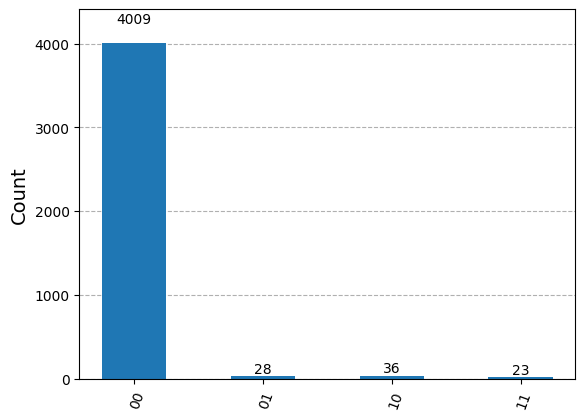

In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

Here is another example:

In [ ]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

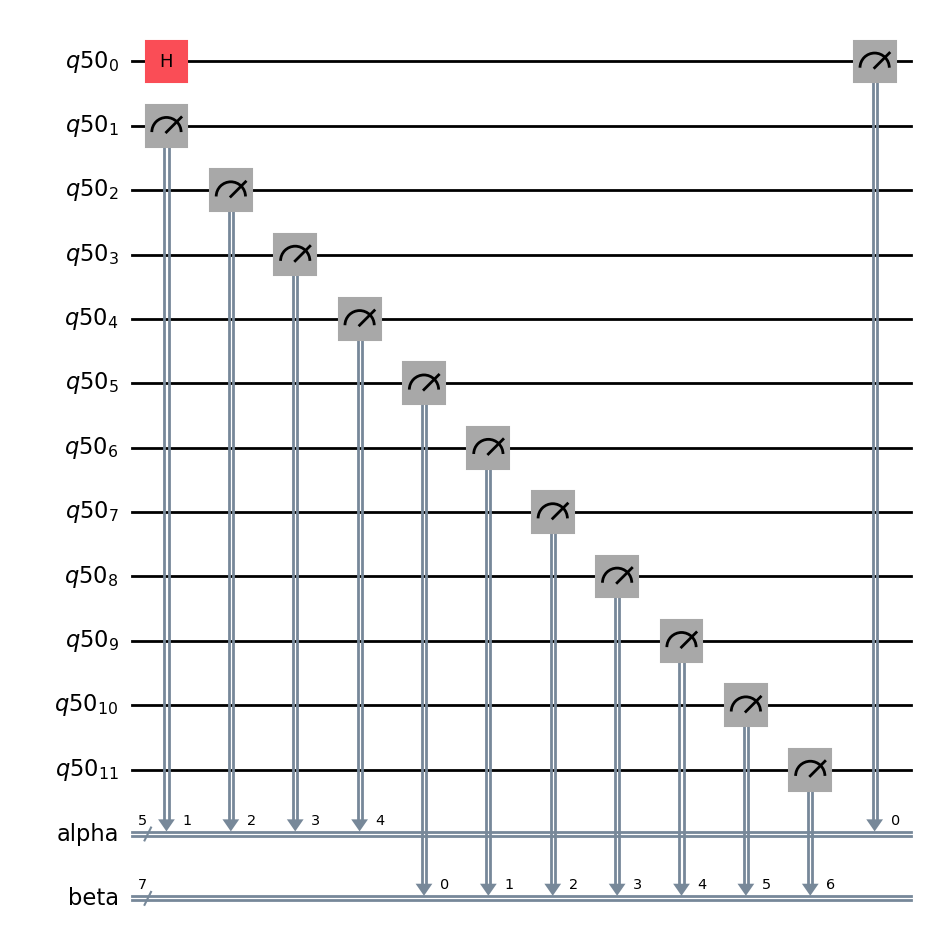

In [ ]:
alpha = ClassicalRegister(5, "alpha")
beta = ClassicalRegister(7, "beta")
qreg = QuantumRegister(12)

circuit = QuantumCircuit(qreg, alpha, beta)
circuit.h(0)
circuit.measure(qreg[:5], alpha)
circuit.measure(qreg[5:], beta)
circuit.draw('mpl')

In [ ]:
service = QiskitRuntimeService(channel="ibm_quantum", token="482cfbd6dec57e562dd79640807643b60b7388db6a0ff63e30b4bd92d4d55601a902c6f005413b8a69f6677daf23c82fa14626594ab3656d9c8c0e9229f920de")
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=12)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

sampler = Sampler(backend)
job = sampler.run([isa_circuit])
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(f" >> Counts for the alpha output register: {pub_result.data.alpha.get_counts()}")
print(f" >> Counts for the beta output register: {pub_result.data.beta.get_counts()}")

 >> Counts for the alpha output register: {'00000': 1899, '00001': 2015, '01001': 23, '00100': 23, '01000': 13, '10100': 1, '10001': 18, '10000': 12, '00101': 37, '00011': 25, '00010': 26, '11001': 2, '01100': 1, '00110': 1}
 >> Counts for the beta output register: {'0000000': 3746, '0001000': 117, '0000010': 69, '0000100': 49, '0001100': 2, '0000001': 32, '0010000': 17, '1000100': 1, '0001010': 2, '0000110': 1, '1000000': 44, '0100000': 14, '0011000': 2}


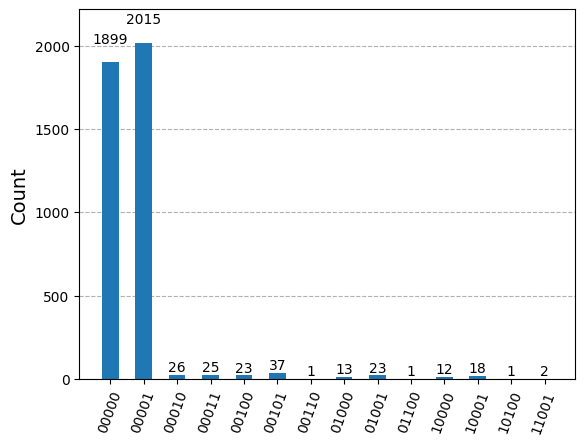

In [ ]:
from qiskit.visualization import plot_histogram

counts1 = pub_result.data.alpha.get_counts()
plot_histogram(counts1)

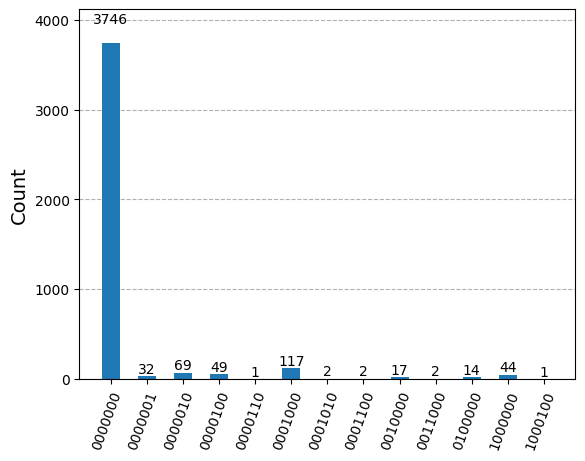

In [ ]:
counts2 = pub_result.data.beta.get_counts()

plot_histogram(counts2)

# Example with Many Quantum Gates:

Below is a quantum circuit example that uses various quantum gates. This example demonstrates how to apply multiple gate types in a circuit. The gates used are: **Hadamard (H), Pauli-X (X), Pauli-Y (Y), Pauli-Z (Z), Controlled-NOT (CX), Swap (SWAP), and T-gate (T)**.

![link text](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Quantum_Logic_Gates.png/440px-Quantum_Logic_Gates.png)

Here is a circuit example of how to apply all this gates:

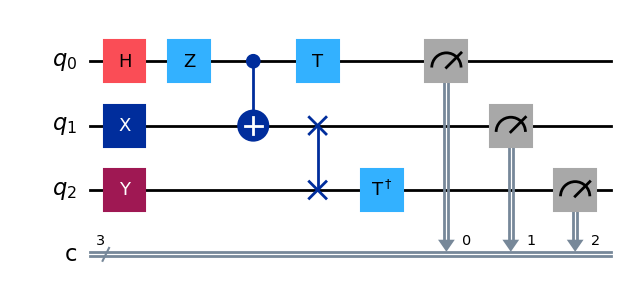

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Create Quantum and Classical Registers
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')

# Create a Quantum Circuit
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])
circuit.x(qr[1])
circuit.y(qr[2])
circuit.z(qr[0])
circuit.cx(qr[0],qr[1])
circuit.swap(qr[1],qr[2])
circuit.t(qr[0])
circuit.tdg(qr[2])
circuit.measure(qr,cr)


# Apply various gates


# Draw the circuit
circuit.draw('mpl')

This circuit applies several different gates on 3 qubits and ends by measuring all qubits. Below are two exercises that will help students practice these gates.

## Exercise 1: Bell State with Swap Gate

Objective: Create a quantum circuit that generates a Bell state between two qubits and then swaps their states.

Instructions:

	1.	Start by applying a Hadamard gate to the first qubit to create a superposition.
	2.	Apply a Controlled-NOT (CX) gate between the first and second qubits to entangle them.
	3.	Use a Swap gate to swap the states of the second and third qubits.
	4.	Measure the qubits and visualize the results.

Hints:

	•	Use the h() gate to apply a Hadamard gate.
	•	Use the cx() gate to apply a CNOT gate.
	•	Use the swap() gate to apply a SWAP gate.
	•	Use the measure() function to measure the qubits.

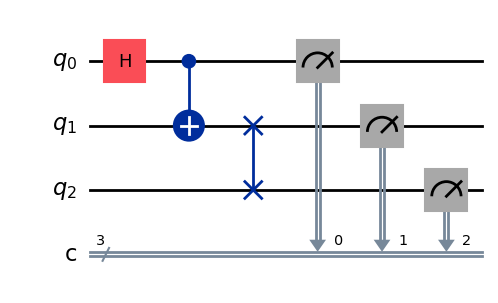

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')

circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])
circuit.cx(qr[0],qr[1])
circuit.swap(qr[1],qr[2])

circuit.measure(qr,cr)

circuit.draw('mpl')






## Exercise 2: Implementing a Qiskit Circuit from a Circuit Plot

Objective:

Implement the Qiskit circuit that matches the quantum circuit plot shown below. The circuit involves 4 qubits and uses a combination of Pauli-X (X), CNOT (CX), Measure and Barrier.

![link text](https://i.sstatic.net/fIVoY.png)


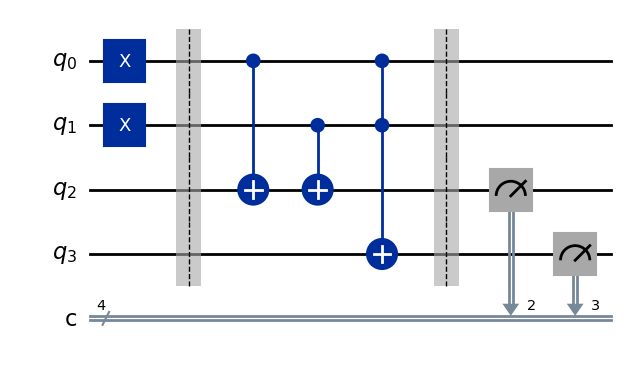

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qr = QuantumRegister(4, 'q')
cr = ClassicalRegister(4, 'c')

circuit = QuantumCircuit(qr, cr)

circuit.x(qr[0])
circuit.x(qr[1])
circuit.barrier()
circuit.cx(qr[0],qr[2])
circuit.cx(qr[1],qr[2])
circuit.ccx(qr[0],qr[1],qr[3])
circuit.barrier()

circuit.measure(qr[2], cr[2])
circuit.measure(qr[3], cr[3])
circuit.draw('mpl')


**QuantumRegister** – this is a class that holds our qubits.

**QuantumCircuit** – we will store opera!ons into QuantumCircuits.

**execute** – this is a function that we must import in order to run our quantum algorithms.


Review

In order to run a circuit with success i=on qiskit quantum computers we need to keep in mind the following steps:

```
- Import the libraries
- Connect our accont by token
- Get the backend
- Create a quantum ciscuit using qiskit tools
- Run a job
- Plot the results

```

This steps wil help you remember what you need to do, create your code and evaluate it.






References:

[Intall Qiskit](https://docs.quantum.ibm.com/guides/install-qiskit)

[Get backend information with Qiskit](https://docs.quantum.ibm.com/guides/get-qpu-information)

[Migrate to the Qiskit Runtime V2 primitives](https://docs.quantum.ibm.com/migration-guides/v2-primitives)

[IBMQJob](https://docs.quantum.ibm.com/api/qiskit/0.19/qiskit.providers.ibmq.job.IBMQJob)

[Catalog](https://learning.quantum.ibm.com/catalog/tutorials)

[Qiskit Tutorials on Github](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits/01_circuit_basics.ipynb)